In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("superstore.csv", encoding='windows-1254')
display(df.head())

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df = df.sort_values(by="Order Date")
df.info

<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
7980    7981  CA-2014-103800 2014-01-03 2014-01-07  Standard Class   
739      740  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
740      741  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
741      742  CA-2014-112326 2014-01-04 2014-01-08  Standard Class   
1759    1760  CA-2014-141817 2014-01-05 2014-01-12  Standard Class   
...      ...             ...        ...        ...             ...   
5091    5092  CA-2017-156720 2017-12-30 2018-01-03  Standard Class   
908      909  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   
907      908  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   
1296    1297  CA-2017-115427 2017-12-30 2018-01-03  Standard Class   
906      907  CA-2017-143259 2017-12-30 2018-01-03  Standard Class   

     Customer ID      Customer Name      Segment        Country  \
7980    DP-13000      Darren Powers     Consumer  United Sta

In [9]:
df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [11]:
df['Country'].unique()

array(['United States'], dtype=object)

In [12]:
df = df.drop(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'Postal Code', 'Product Name'], axis=1)
display(df.head())

,Order Date,Ship Date,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
7980,2014-01-03,2014-01-07,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,16.448,2,0.2,5.5512
739,2014-01-04,2014-01-08,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,11.784,3,0.2,4.2717
740,2014-01-04,2014-01-08,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,272.736,3,0.2,-64.7748
741,2014-01-04,2014-01-08,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,3.540,2,0.8,-5.4870
1759,2014-01-05,2014-01-12,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,19.536,3,0.2,4.8840


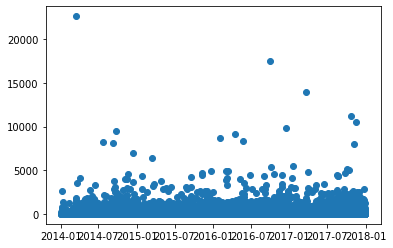

In [13]:
plt.scatter(x=df['Order Date'], y=df['Sales'])

<AxesSubplot:xlabel='State'>

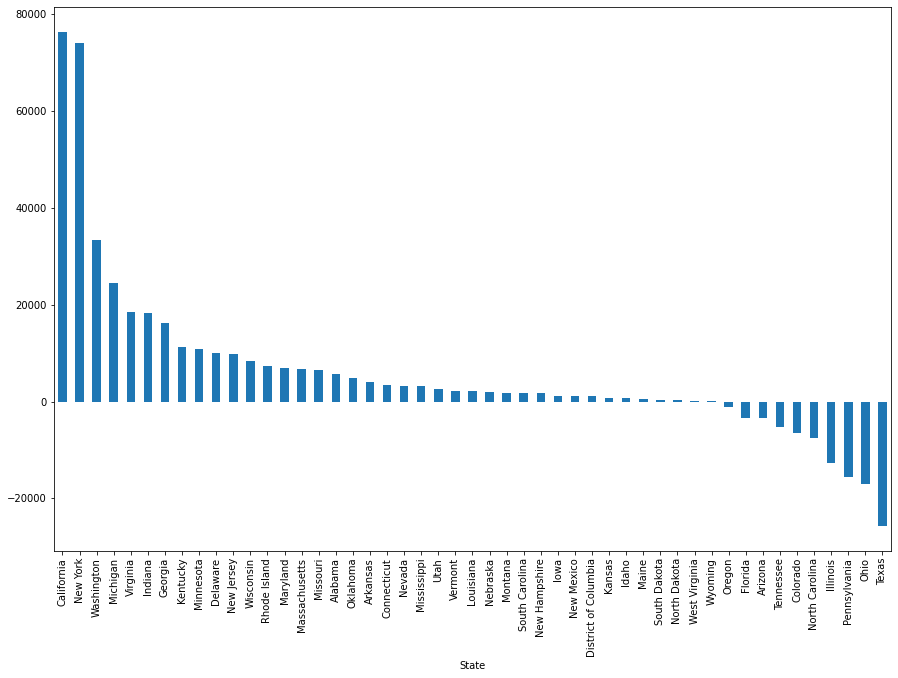

In [14]:
profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
profit_state.plot.bar()

<AxesSubplot:xlabel='State'>

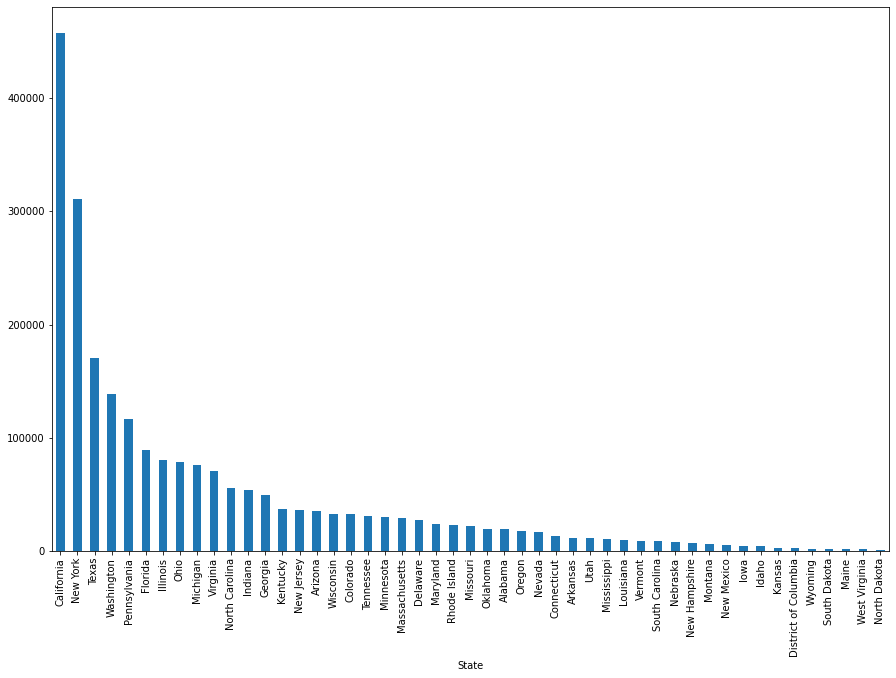

In [15]:
sales_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sales_state.plot.bar()

<AxesSubplot:xlabel='Category', ylabel='count'>

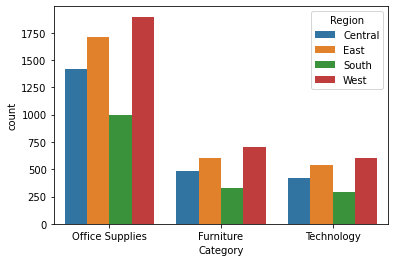

In [16]:
sns.countplot(x='Category', hue='Region', data=df)

<AxesSubplot:xlabel='Region', ylabel='Sales'>

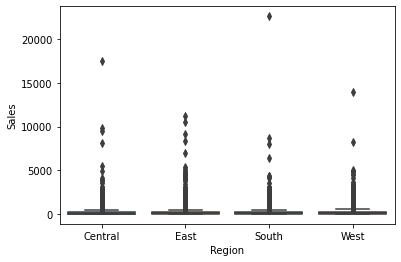

In [17]:
sns.boxplot(x='Region', y='Sales', data=df)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

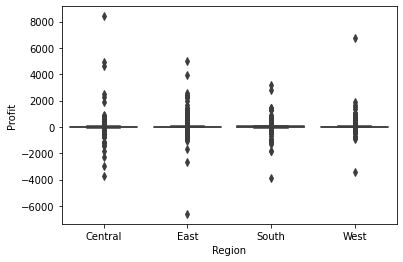

In [18]:
sns.boxplot(x='Region', y='Profit', data=df)

<AxesSubplot:xlabel='Category'>

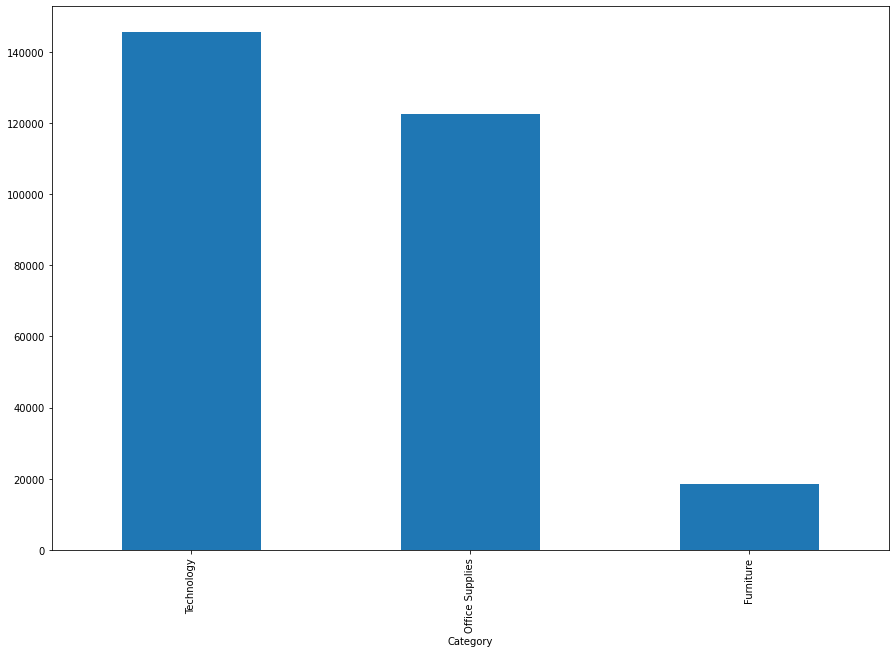

In [19]:
profit_category = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
profit_category.plot.bar()

<AxesSubplot:xlabel='Category'>

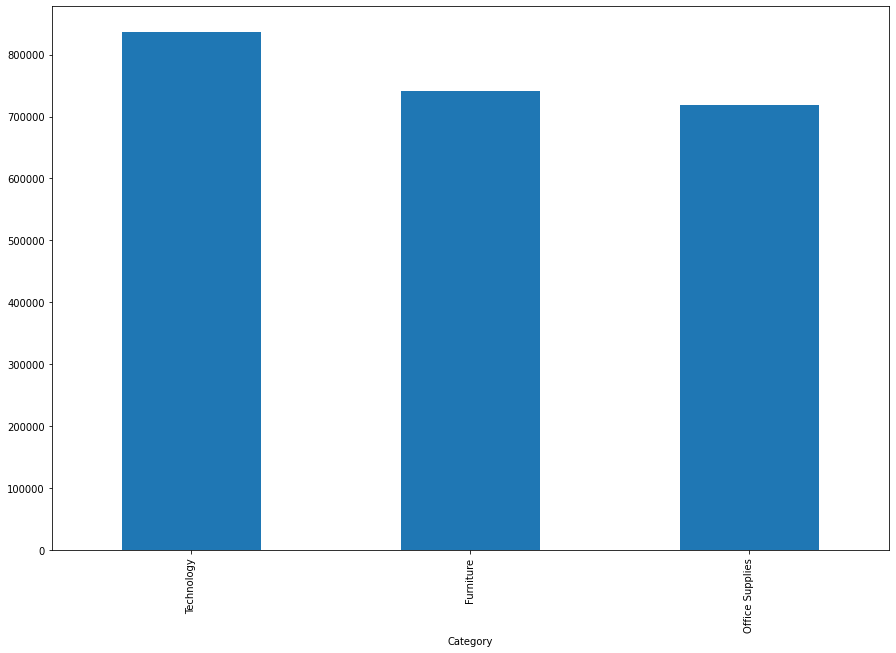

In [20]:
sales_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sales_category.plot.bar()

In [21]:
mean = np.mean(df['Sales'])
std = np.std(df['Sales'])
median = np.median(df['Sales'])

print(mean, std, median)
print(df['Sales'].skew())

229.85800083049827 623.2139187650461 54.489999999999995
12.97275234181623


In [22]:
df['Sales'].values[df['Sales'] > std*3] = median

In [23]:
mean = np.mean(df['Sales'])
std = np.std(df['Sales'])
median = np.median(df['Sales'])

print(mean, std, median)
print(df['Sales'].skew())

172.25497705623374 283.3907759524266 54.485
2.8241603822608967


In [24]:
df.columns

Index(['Order Date', 'Ship Date', 'Segment', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [28]:
X = pd.DataFrame({
    'Segment': df['Segment'],
    'Region': df['Region'],
    'Sub-Category': df['Sub-Category'],
    'Product ID': df['Product ID'],
    'Quantity': df['Quantity'],
    'Order Date': df['Order Date'],
})

initial_date = X['Order Date'].iloc[0]

X['Order Date'] = (X['Order Date'] - initial_date).dt.days

display(X.head())

X = pd.get_dummies(X,drop_first=True)
y = pd.DataFrame({
    'Sales': df['Sales'],
})

,Segment,Region,Sub-Category,Product ID,Quantity,Order Date
7980,Consumer,Central,Paper,OFF-PA-10000174,2,0
739,Home Office,Central,Labels,OFF-LA-10003223,3,1
740,Home Office,Central,Storage,OFF-ST-10002743,3,1
741,Home Office,Central,Binders,OFF-BI-10004094,2,1
1759,Consumer,East,Art,OFF-AR-10003478,3,2


In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge model performance (mean squared error): ", mean_squared_error(y_test, ridge_pred))
print("Ridge model performance (mean absolute error): ", mean_absolute_error(y_test, ridge_pred))

Ridge model performance (mean squared error):  29247.211778762692
Ridge model performance (mean absolute error):  92.67947563377406


In [37]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso model performance (mean squared error): ", mean_squared_error(y_test, lasso_pred))
print("Lasso model performance (mean absolute error): ", mean_absolute_error(y_test, lasso_pred))

Lasso model performance (mean squared error):  47826.657081831494
Lasso model performance (mean absolute error):  135.53444602093418


In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
model = rfr.fit(X_train, y_train.values.ravel())
rfr_pred = model.predict(X_test)
print("RFR model performance (mean squared error): ", mean_squared_error(y_test, rfr_pred))
print("RFR model performance (mean absolute error): ", mean_absolute_error(y_test, rfr_pred))

RFR model performance (mean squared error):  28557.57028240645
RFR model performance (mean absolute error):  74.22566112056029


In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
accuracy = cross_val_score(rfr, X_train, y_train.values.ravel(), cv = 3)

print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

test
Accuracy: 49.60 %
Standard Deviation: 3.16 %


In [45]:
df_final = df.copy()
display(df_final.head())


initial_date = df_final['Order Date'].iloc[0]
df_final['Order Date'] = (df_final['Order Date'] - initial_date).dt.days

initial_date = df_final['Ship Date'].iloc[0]
df_final['Ship Date'] = (df_final['Ship Date'] - initial_date).dt.days

display(df_final.head())


df_final = pd.get_dummies(df_final,drop_first=True)
display(df_final.head())

X = df_final.drop('Sales', axis=1)
X = X.astype(float)
y = df_final['Sales']



,Order Date,Ship Date,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
7980,2014-01-03,2014-01-07,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,16.448,2,0.2,5.5512
739,2014-01-04,2014-01-08,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,11.784,3,0.2,4.2717
740,2014-01-04,2014-01-08,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,272.736,3,0.2,-64.7748
741,2014-01-04,2014-01-08,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,3.540,2,0.8,-5.4870
1759,2014-01-05,2014-01-12,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,19.536,3,0.2,4.8840


,Order Date,Ship Date,Segment,City,State,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
7980,0,0,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,16.448,2,0.2,5.5512
739,1,1,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,11.784,3,0.2,4.2717
740,1,1,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,272.736,3,0.2,-64.7748
741,1,1,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,3.540,2,0.8,-5.4870
1759,2,5,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,19.536,3,0.2,4.8840


,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Segment_Corporate,Segment_Home Office,City_Abilene,City_Akron,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
7980,0,0,16.448,2,0.2,5.5512,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
739,1,1,11.784,3,0.2,4.2717,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
740,1,1,272.736,3,0.2,-64.7748,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
741,1,1,3.540,2,0.8,-5.4870,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,2,5,19.536,3,0.2,4.8840,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
model = rfr.fit(X_train, y_train.values.ravel())
rfr_pred = model.predict(X_test)
print("RFR model performance (mean squared error): ", mean_squared_error(y_test, rfr_pred))
print("RFR model performance (mean absolute error): ", mean_absolute_error(y_test, rfr_pred))

RFR model performance (mean squared error):  23368.201128775956
RFR model performance (mean absolute error):  53.783614366183095


In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
accuracy = cross_val_score(rfr, X_train, y_train.values.ravel(), cv = 3)

print("Accuracy: {:.2f} %".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracy.std()*100))

Accuracy: 72.60 %
Standard Deviation: 1.95 %
